# Run the whole deltas algorithm

In [187]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pipeline
import deltas

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data and classifier

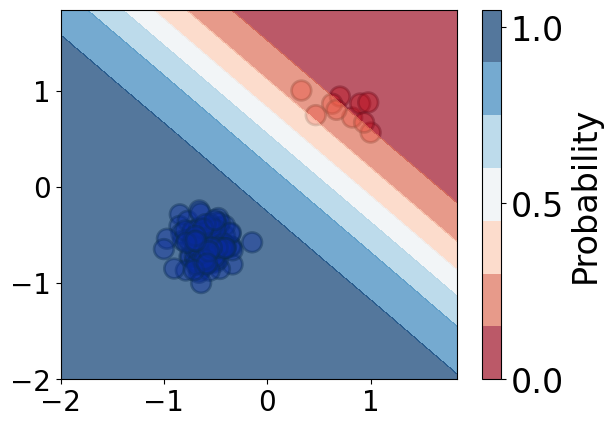

In [188]:
N1 = 100
N2 = 100
data_clf = pipeline.get_data_and_classifier(N1=N1, N2=N2)

data = data_clf['data']
clf = data_clf['clf']
m1 = data_clf['mean1']
m2 = data_clf['mean2']

## Get projection and data we need (R, D, M etc.)

R1 empirical: 0.3876876450169934
R2 empirical: 0.2292098756080071


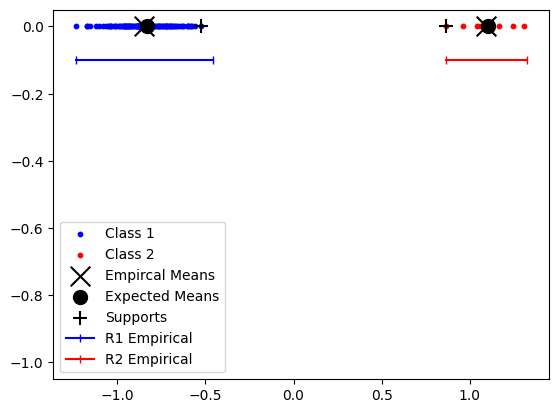

In [189]:
data_info = pipeline.data_project_and_info(
    data=data_clf['data'], m1=data_clf['mean1'], m2=data_clf['mean2'], clf=data_clf['clf'], data_test=data_clf['data_test'])

## set up extra parameters

In [190]:
# Costs
data_info['c1'] = 1
data_info['c2'] = 1
data_info['N1'] = N1
data_info['N2'] = N2
pipeline.print_params(data_info)

Parameters
        R:  1.3062452282837946
        N1: 100
        N2: 100
        R1: 0.3876876450169934
        R2: 0.2292098756080071
        M:  1.389687642321722
        D:  1.942082083989205
        C1: 1
        C2: 1


## Optimiser

delta1 : 1.0 
delta2: 0.5893148371305389
constraint: 1.6991951391813371 should equal 0
R1_est : 0.9101857363305113 
R2_est: 1.8814939172493625 
D_emp: 1.942082083989205


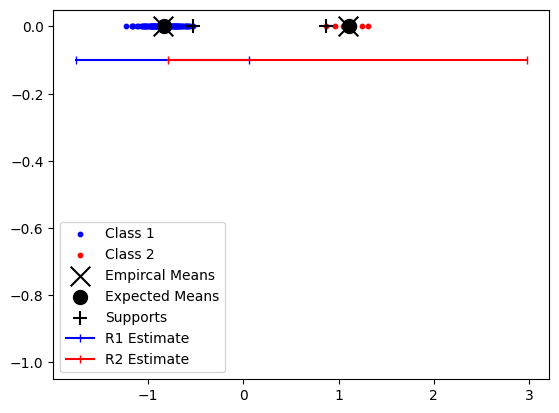

In [191]:

loss_func = deltas.scipy_optim_func   # returns tuple for (loss_func, gradient)
loss_func = deltas.loss_one_delta   # loss_func only - won't use gradient during optimisation

contraint_func = deltas.contraint_eq7
# contraint_func = deltas.contraint_eq8

delta1_from_delta2_func = deltas.delta2_given_delta1_matt
 
delta1, delta2 = pipeline.optimise(
    data_info, loss_func, contraint_func, delta1_from_delta2_func)

# Evaluation on test data

In [192]:
pipeline.eval_test(data_clf, data_info, delta1, delta2)

original accuracy: 0.9999
deltas   accuracy: 0.99975


# test is delta 2 given delta 1 equation satifies the contraint

In [193]:
delta1 = delta1
delta1 = 1
# delta2 = delta1_from_delta2_func(delta1, data_info)
delta2 = deltas.delta2_given_delta1_matt(delta1, data_info)

print(delta1)
print(delta2)
print(contraint_func(delta1, delta2, data_info))
print(deltas.eq7_matt(delta1, delta2, data_info))

1
0.5893148371305389
1.6991951391813371
1.4503537723278397
